# Figure H: K-means typology

In [1]:
# Import 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sys
sys.path.append('../')
from helpers import cm2inch, title, show_num_contours, load_datasets
from melodic_contour import *
matplotlib.style.use('styles.mplstyle')

In [2]:
dfs, contours = load_datasets()

In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

In [15]:
dataset_ids = [
    'creighton', 
    'boehme',
    'erk',
    'han',
    'shanxi',
    'natmin',
    'liber-antiphons',
    'liber-alleluias',
    'liber-responsories'
]

In [151]:
all_contours = np.concatenate([contours[d] for d in dataset_ids])
all_contours.shape

(18366, 50)

In [209]:
# np.random.seed(0)
# train, test = train_test_split(all_contours, shuffle=True, train_size=.5)
# train.shape

In [208]:
# sse = {}
# sill_coeffs = []
# for k in range(2, 13):
#     kmeans = KMeans(n_clusters=k, random_state=0).fit(train)
#     label = kmeans.labels_
#     sil_coeff = silhouette_score(train, label, metric='euclidean')
#     sill_coeffs.append(sil_coeff)
#     sse[k] = kmeans.inertia_

In [159]:
kmeans = {}
for k in range(2, 16):
    kmeans[k] = KMeans(n_clusters=k, random_state=0).fit(all_contours)

/Users/bas/repos/papers/contour-typology/env/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


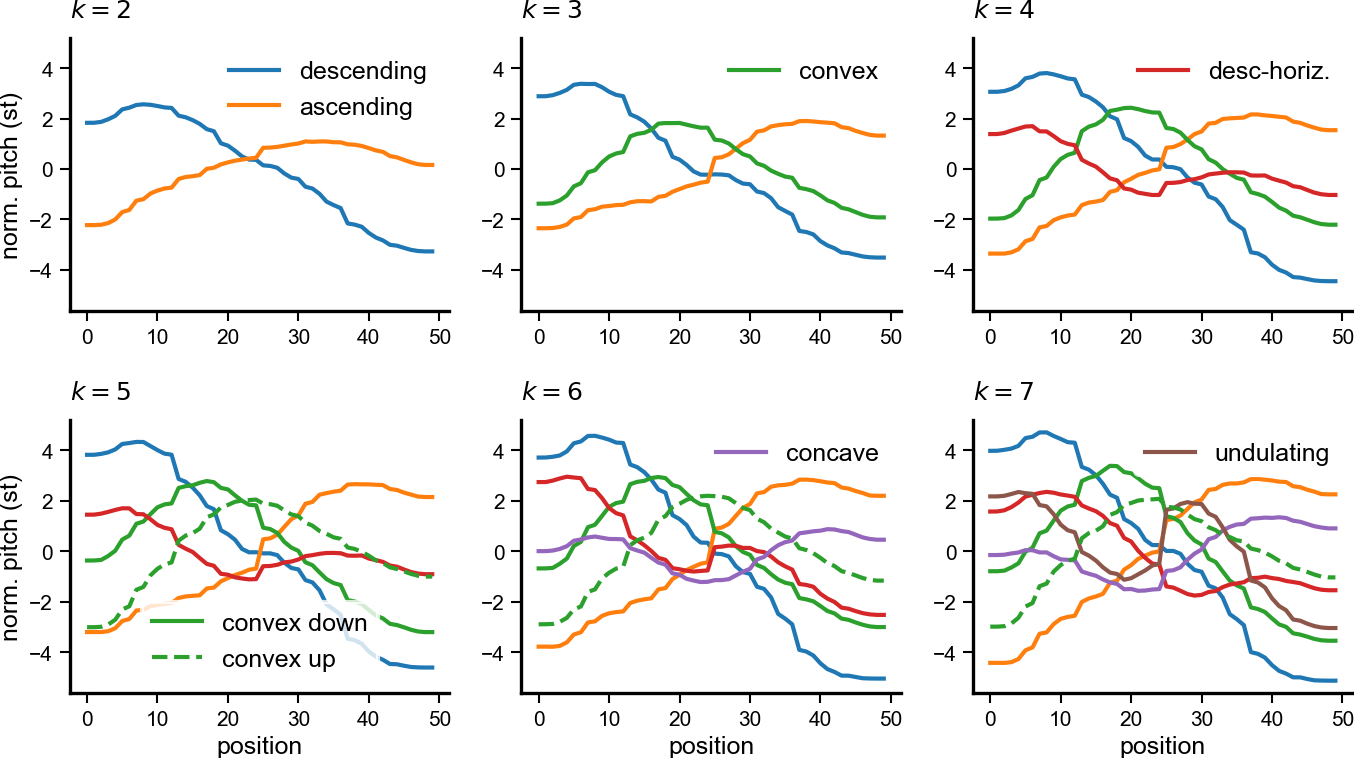

In [221]:
def title(k):
    plt.title(f'$k={k}$', x=0, ha='left', fontweight='bold')
plt.figure(figsize=cm2inch(12,7))
props = dict(lw=1)

ax1 = plt.subplot(231)
order2 = [1, 0]
lines = plt.plot(kmeans[2].cluster_centers_.T[:, order2], **props)
title(2)
plt.legend(lines, ['descending', 'ascending'])
plt.ylabel('norm. pitch (st)')

ax2 = plt.subplot(232, sharey=ax1)
title(3)
order3 = [1,2,0]
lines3 = plt.plot(kmeans[3].cluster_centers_.T[:, order3], **props)
plt.legend([lines3[2]], ['convex'])

plt.subplot(233, sharey=ax1)
title(4)
order4 = [1, 0, 2, 3]
lines4 = plt.plot(kmeans[4].cluster_centers_.T[:, order4], **props)
plt.legend([lines4[3]], ['desc-horiz.'])

plt.subplot(234, sharey=ax1)
title(5)
order5 = [1,2,3,4,0]
lines5 = plt.plot(kmeans[5].cluster_centers_.T[:, order5], **props)
lines5[4].set_linestyle('--')
lines5[4].set_color('C2')
plt.legend([lines5[2], lines5[4]], ['convex down', 'convex up'])
plt.xlabel('position')
plt.ylabel('norm. pitch (st)')

plt.subplot(235, sharey=ax1)
title(6)
order6 = [5,4,3,0,2,1]
lines6 = plt.plot(kmeans[6].cluster_centers_.T[:, order6], **props)
lines6[5].set_color('C2')
lines6[5].set_linestyle('--')
# lines6[3].set_color('C4')
plt.legend([lines6[4]], ['concave'])
plt.xlabel('position')

plt.subplot(236, sharey=ax1)
title(7)
order7 = [5,4,3,6,2,0,1]
lines7 = plt.plot(kmeans[7].cluster_centers_.T[:, order7], **props)
lines7[6].set_color('C2')
lines7[6].set_linestyle('--')
plt.legend([lines7[5]], ['undulating'])
plt.xlabel('position')


plt.tight_layout()
plt.savefig('../figures/figH1-kmeans-types.pdf')

In [212]:
# order8 = [4,7,1,6,3,5,0,2]
# plt.plot(kmeans[8].cluster_centers_.T[:, order8])

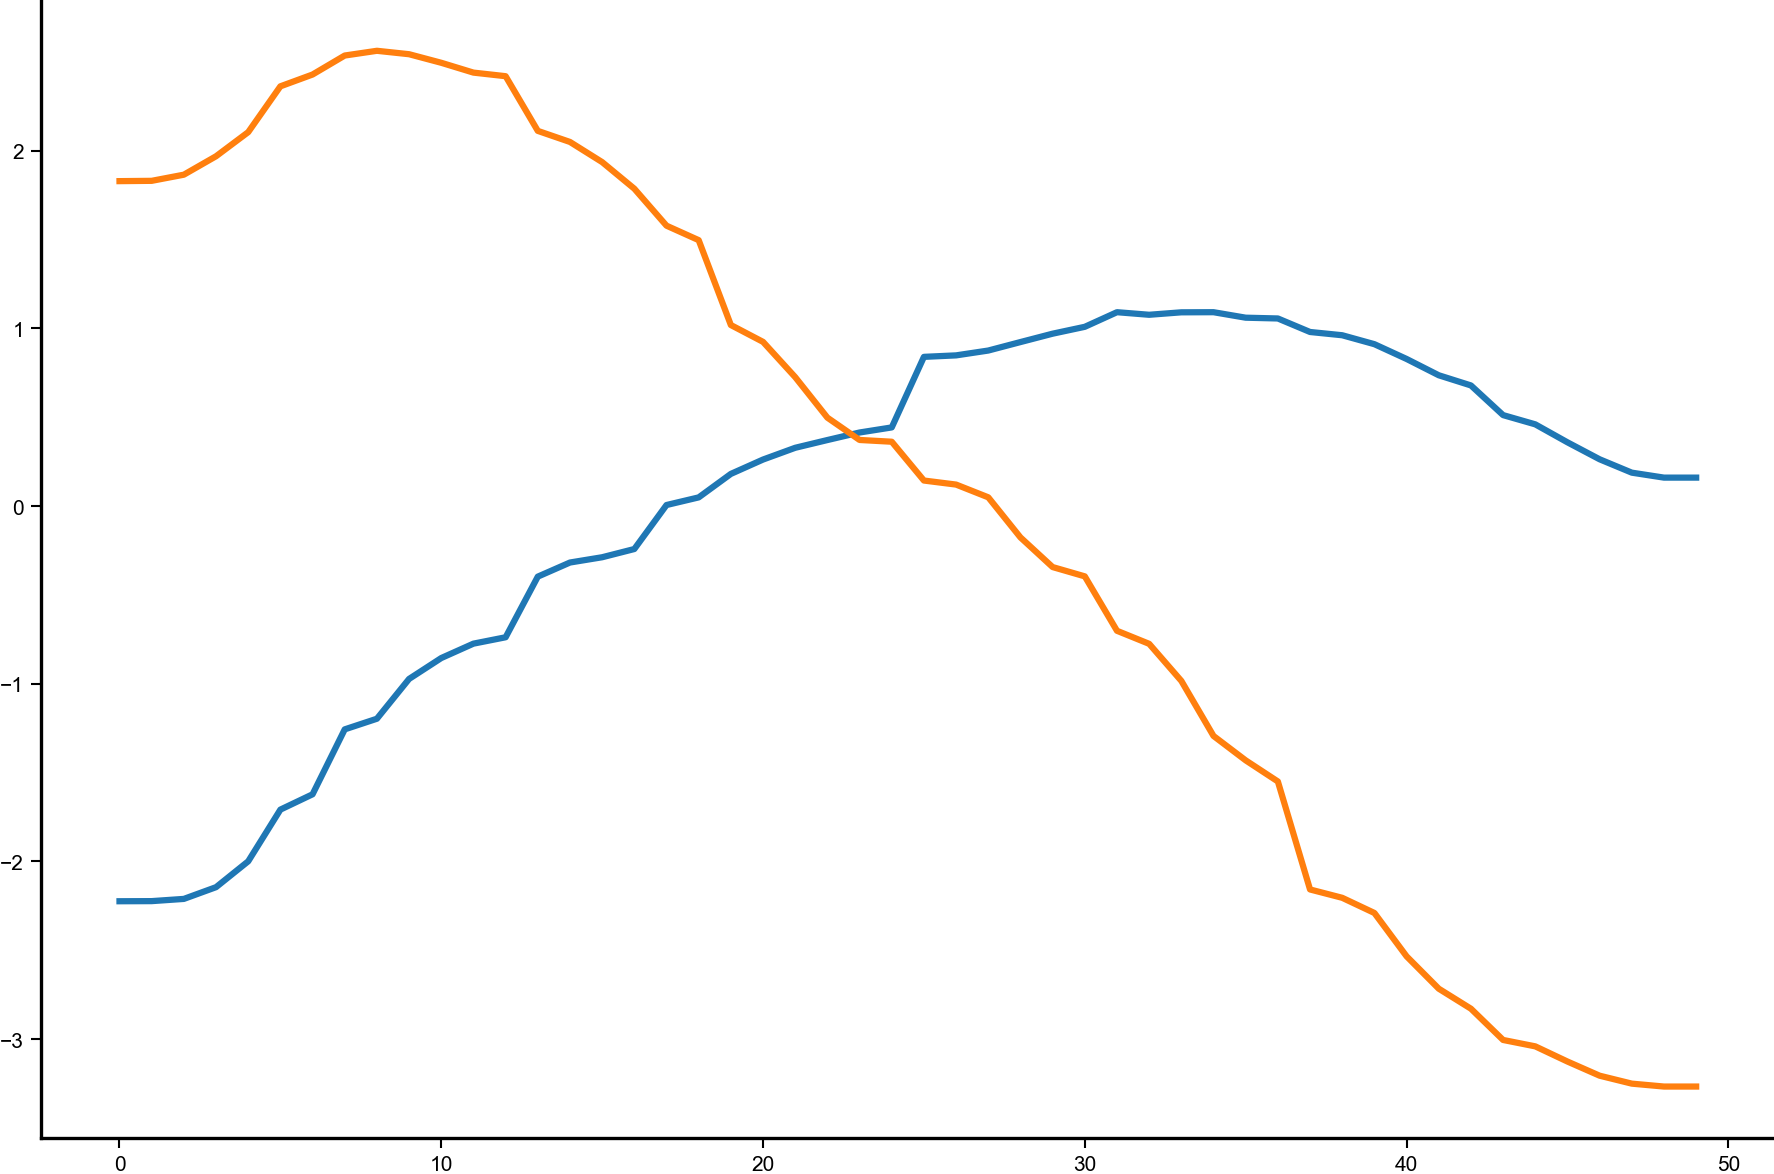

In [219]:
plt.plot(all_contours[kmeans[2].labels_ == 0].mean(axis=0))
plt.plot(all_contours[kmeans[2].labels_ == 1].mean(axis=0))